## 1. 꺾은선 그래프로 표현하기

궁금한 동네 이름을 입력해주세요 : 송도3동


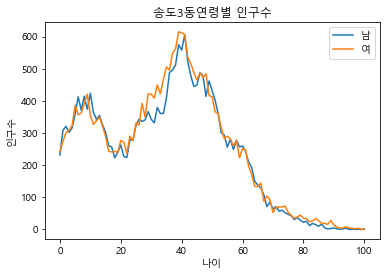

In [15]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male, female = [], []
name = input('궁금한 동네 이름을 입력해주세요 : ')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            male.append(int(row[i]))          # 남성 데이터 저장하기
            female.append(int(row[i+103]))    # 여성 데이터 저장하기
        break
        
plt.rc('font', family='Malgun Gothic')
plt.title(name + '연령별 인구수')
plt.plot(male, label='남')
plt.plot(female, label='여')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.legend()
plt.show()

## 2. 막대그래프로 표현하기

* bar() 함수
    - bar(막대를 표시할 위치, 막대의 높이(길이))
    - range() 함수를 이용하여 오름차순으로 그리기

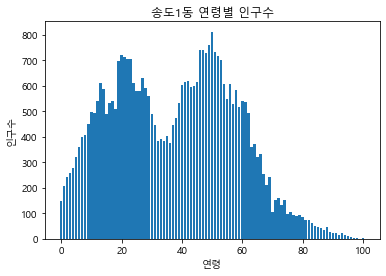

In [3]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []

for row in data:
    if '송도1동' in row[0]:
        for m, fm in zip(row[3:104], row[106:207]):
            result.append(int(m) + int(fm))
            
f.close()

plt.rc('font', family = 'Malgun Gothic')
plt.title('송도1동 연령별 인구수')

plt.bar(range(101), result)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.show()

* 수평 막대그래프(barh() 함수)를 활용해 우리 동네 인구 구조 시각화
    - plt.barh(range(101), result)
    - range(101): y축의 막대 위치 / result: 막대의 너비

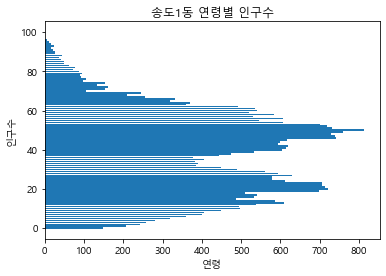

In [4]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []

for row in data:
    if '송도1동' in row[0]:
        for m, fm in zip(row[3:104], row[106:207]):
            result.append(int(m) + int(fm))
            
f.close()

plt.rc('font', family = 'Malgun Gothic')
plt.title('송도1동 연령별 인구수')

plt.barh(range(101), result)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.show()

* 연령별 (남성 인구 - 여성 인구) 값 result에 저장하고 막대그래프로 표현하기

궁금한 동네 이름을 입력해주세요 : 송도2동


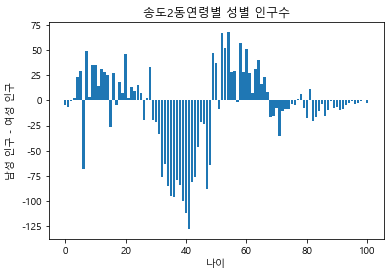

In [18]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []
name = input('궁금한 동네 이름을 입력해주세요 : ')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            m = int(row[i])
            fm = int(row[i+103])
            result.append(m-fm)
        break
        
f.close()

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name + '연령별 성별 인구수')
plt.bar(range(101), result)
plt.xlabel('나이')
plt.ylabel('남성 인구 - 여성 인구')
plt.show()

## 3. 항아리 그래프로 표현하기

* 성별 데이터 저장하기
    - 남성 데이터를 음수로 바꾸기

In [7]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male = []
female = []

for row in data:
    if '송도1동' in row[0]:
        for i in row[3:104]:
            # male.append(int(i))   # 남성 데이터를 리스트 male에 저장
            male.append(-int(i))    # 마이너스 부호를 넣어서 음수로 변경
        for i in row[106:207]:
            female.append(int(i))   # 여성 데이터를 리스트 female에 저장

* 성별 데이터 수평 막대그래프로 시각화하기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


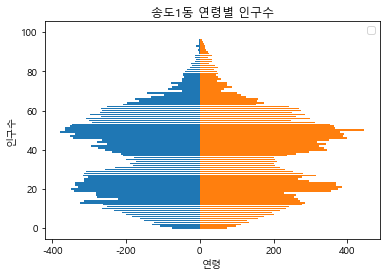

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('송도1동 연령별 인구수')

plt.rcParams['axes.unicode_minus'] = False    # 마이너스 부호 깨짐 해결
plt.barh(range(101), male)
plt.barh(range(101), female)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.legend()  # 범례 추가
plt.show()

## 4. 파이 차트로 나타내기


### (1) 파이 차트로 비율 표현하기

* pie() 함수
    - 파이 차트(pie chart)는 '원 그래프'라고도 불림
    - 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현 (입력한 데이터의 크기에 따라 원의 비율이 결정됨)
    - **파이 차트는 리스트를 1개만 받음**
    
    
* 동그란 원으로 표현
    - axis() 함수를 추가하여 동그란 원 그리기 가능
    - plt.axis('equal')이 없는 경우, 찌그러진 원이 그려질 수 있음
    

* 레이블 추가
    - plt.pie(labels=['레이블1', '레이블2', '레이블3', '레이블4'])
    

* 비율 및 범례 표시
    - plt.pie(autopct='%.1f%%')
    - plt.legend()
    
    - 너무 긴 값은 리스트로 전달
    - 정확한 계산을 위해 소수점까지 나타내는 실수(float) 형태로 표시
    - 퍼센트: 소수점 첫째줄까지 나타내라 = 둘째자리에서 반올림하라 = 36.9%
    
    
* 색 정하기
    - plt.pie(colors=['darkmagenta', 'deeppink', 'hotpink', 'pink'])
    - 다양한 색상 https://matplotlib.org/stable/gallery/color/named_colors.html
    
    
* 돌출 효과로 강조하기
    - plt.pie(explode = (0, 0, 0.1, 0))
    - 강조하고 싶은 데이터의 값 변경. 수가 커질수록 돌출정도가 커짐 (0은 돌출되지 않음)

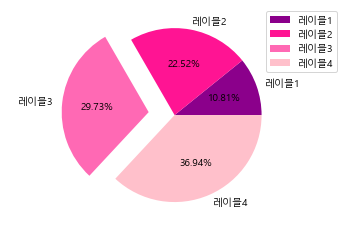

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.axis('equal')
size = [120, 250, 330, 410]
label = ['레이블1', '레이블2', '레이블3', '레이블4']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
exp = (0, 0, 0.3, 0)
plt.pie(size, labels=label, autopct='%.2f%%', colors=color, explode=exp)
plt.legend()
plt.show()

### (2) 성별 인구 비율 표현하기

* 성별 인구 총합을 더하여 파이차트로 그리기

In [11]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []
m_sum, f_sum = 0, 0

for row in data:
    if '송도1동' in row[0]:
        for i in range(101):
            m_sum = m_sum + int(row[i+3])     # 3~103번까지 데이터 더하기 (남성)
            f_sum += int(row[i+106])          # 106~206번까지 데이터 더하기 (여성)
            
result.append(m_sum)                          # 남성 합계 데이터 리스트에 추가
result.append(f_sum)                          # 여성 합계 데이터 리스트에 추가
print(result)

[18593, 19198]


* 파이 차트로 표현하기

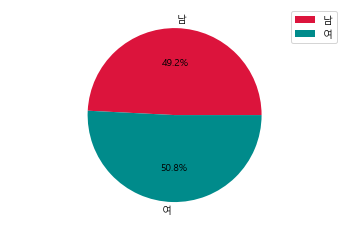

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')

label = ['남', '여']
color = ['crimson', 'darkcyan']
plt.pie(result, labels=label, autopct='%.1f%%', colors=color)
plt.legend()
plt.show()

* 파이 차트로 표현하기
    - plt.pie(startangle=90) 이용하기
    - startangle 속성은 파이 차트의 시작 각도를 정해줌
        - 90으로 설정한 경우, 반시계방향으로 90도 이동하여, 12시 정각위치에서 그래프가 시작됨
        - 기본 시작점은 오른쪽 3시 방향 선

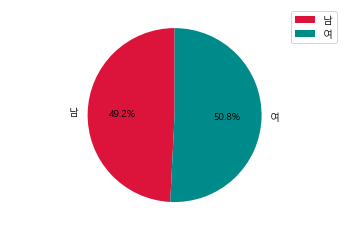

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')

label = ['남', '여']
color = ['crimson', 'darkcyan']
plt.pie(result, labels=label, autopct='%.1f%%', colors=color, startangle=90)
plt.legend()
plt.show()

## 5. scatter() 함수로 표현하기

* 산점도(= 점이 흩어져있는 그래프)로 표현하기
    - 'scatter', '흩뿌리다', '사방으로 흩어지다': 여기저기 점이 흩어진 모양의 그래프
    
    
* x축과 y축에 해당하는 데이터의 상관관계를 표현할 때 사용
    - 두 개의 축을 기준으로, 데이터가 얼마나 퍼져있는지(분포) 알 수 있어 '산포도'라고 불림

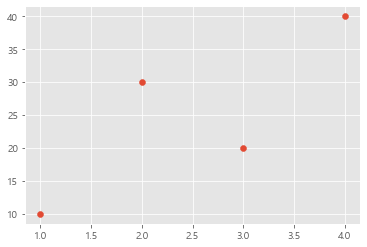

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40])
plt.show()

## 6. 버블 차트로 표현하기

* scatter() 함수를 이용하여 버블 차트를 그릴 수 있음
    - 기존 코드에서 size를 의미하는 s 속성을 추가하고, 원하는 크기를 입력

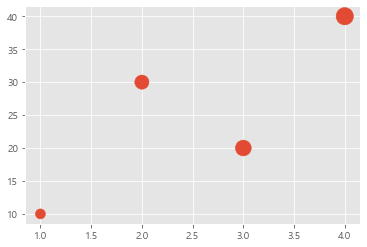

In [20]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s=[100, 200, 250 ,300])
plt.show()

* 컬러 추가도 가능

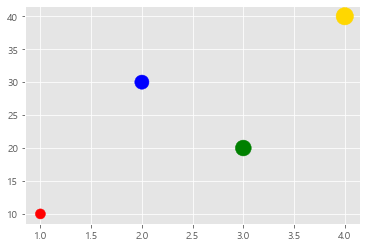

In [21]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
x_list = [1, 2, 3, 4]
y_list = [10, 30, 20, 40]
size = [100, 200, 250, 300]
plt.scatter(x_list, y_list, s=size, c=['r', 'b', 'g', 'gold'])
plt.show()

* 버블차트에 컬러바 추가
    - colorbar() 함수 이용
    - scatter() 함수에 c 속성을 추가하여, 표현하고 싶은 색상의 개수 설정 -> 각 데이터에 해당하는 컬러바의 색으로 결정됨    

C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\3122431817.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


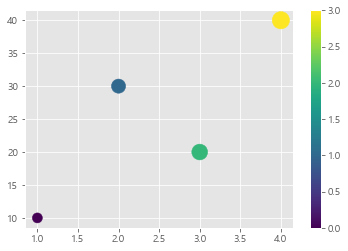

In [23]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
x_list = [1, 2, 3, 4]
y_list = [10, 30, 20, 40]
size = [100, 200, 250, 300]
plt.scatter(x_list, y_list, s=size, c=range(4))
plt.colorbar()
plt.show()

* 버블차트에 컬러맵 추가
    - 무지개색과 비슷한 jet 컬러맵
    - https://matplotlib.org/stable/tutorials/colors/colormaps.html

C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\779243641.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


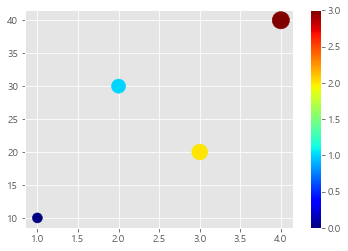

In [26]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
x_list = [1, 2, 3, 4]
y_list = [10, 30, 20, 40]
size = [100, 200, 250, 300]
plt.scatter(x_list, y_list, s=size, c=range(4), cmap='jet')
plt.colorbar()
plt.show()

### 위치, 크기가 서로 다른 100개의 점 만들기

- 랜덤 함수 활용하기: randint(최소, 최대) - 최소부터 최대까지 중 임의의 정수를 리턴


- 컬러맵, 컬러바 추가


- 투명도 설정
    - 작은 점이 큰 점에 의해서 가려지므로 투명도 조절
    - alpha 속성값의 범위: 0~1
    - 0에 가까울수록 투명하고, 1에 가까울수록 불투명함

C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\3783348862.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


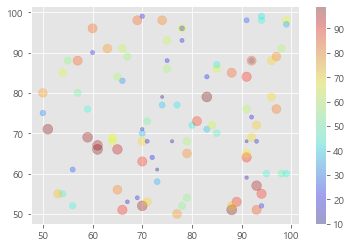

In [27]:
import matplotlib.pyplot as plt
import random

x, y = [], []
size = []

for i in range(100):
    x.append(random.randint(50, 100))
    y.append(random.randint(50, 100))
    size.append(random.randint(10, 100))
    
plt.scatter(x, y, s=size, c=size, cmap='jet', alpha=0.3)
plt.colorbar()

plt.show()

## 5. 연령대별 성별 비율 산점도 표현

* 남녀 연령별 인구 데이터 scatter() 함수로 표현
    - 앞서 꺾은선 그래프로 남녀 인구를 표현할 때 사용했던 코드에서 시작
    - scatter() 함수에 연령별 남성 및 여성 인구수 입력

궁금한 동네 이름을 입력해주세요 : 송도1동


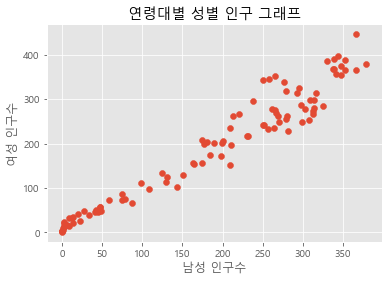

In [28]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male, female = [], []
name = input('궁금한 동네 이름을 입력해주세요 : ')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            male.append(int(row[i]))          # 남성 데이터 저장하기
            female.append(int(row[i+103]))    # 여성 데이터 저장하기
        break
        
plt.rc('font', family = 'Malgun Gothic')
plt.title('연령대별 성별 인구 그래프')
plt.scatter(male, female)
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()

* 연령에 따른 컬러맵 적용

C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\4000084117.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


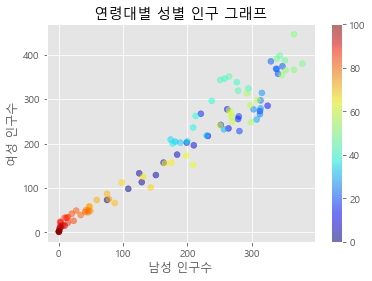

In [29]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('연령대별 성별 인구 그래프')
plt.scatter(male, female, c=range(101), alpha=0.5, cmap='jet') # 컬러맵 적용
plt.colorbar()
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()

### y = x 형태의 추세선 추가하기
    - 남성 인구수 중 가장 큰 값을 기준으로 y=x 형태의 추세선(직선) 그리기
    - **어떤 성별의 인구가 더 많은지 한눈에 들어오도록**

C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\3211173935.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


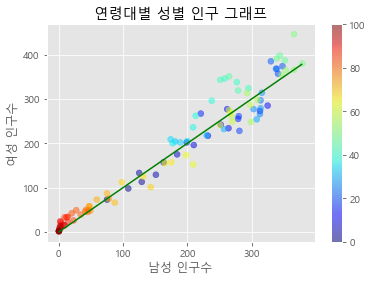

In [30]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('연령대별 성별 인구 그래프')
plt.scatter(male, female, c=range(101), alpha=0.5, cmap='jet') # 컬러맵 적용
plt.colorbar()
line = range(max(male))
plt.plot(line, line, color='g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()

### 원의 크기는 인구수의 제곱근으로 표현

* 남성과 여성 인구수를 합친 값을 size 리스트에 넣어 점의 크기 표현
* 제곱근 함수 sqrt() 사용

In [46]:
import csv
import math

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male, female = [], []
size = []
name = input('궁금한 동네 이름을 입력해주세요 : ')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            m, fm = int(row[i]), int(row[i+103])
            male.append(m)          # 남성 데이터 저장하기
            female.append(fm)       # 여성 데이터 저장하기
            size.append(math.sqrt(m+fm))
        break

궁금한 동네 이름을 입력해주세요 : 송도1동


C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\1229813172.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


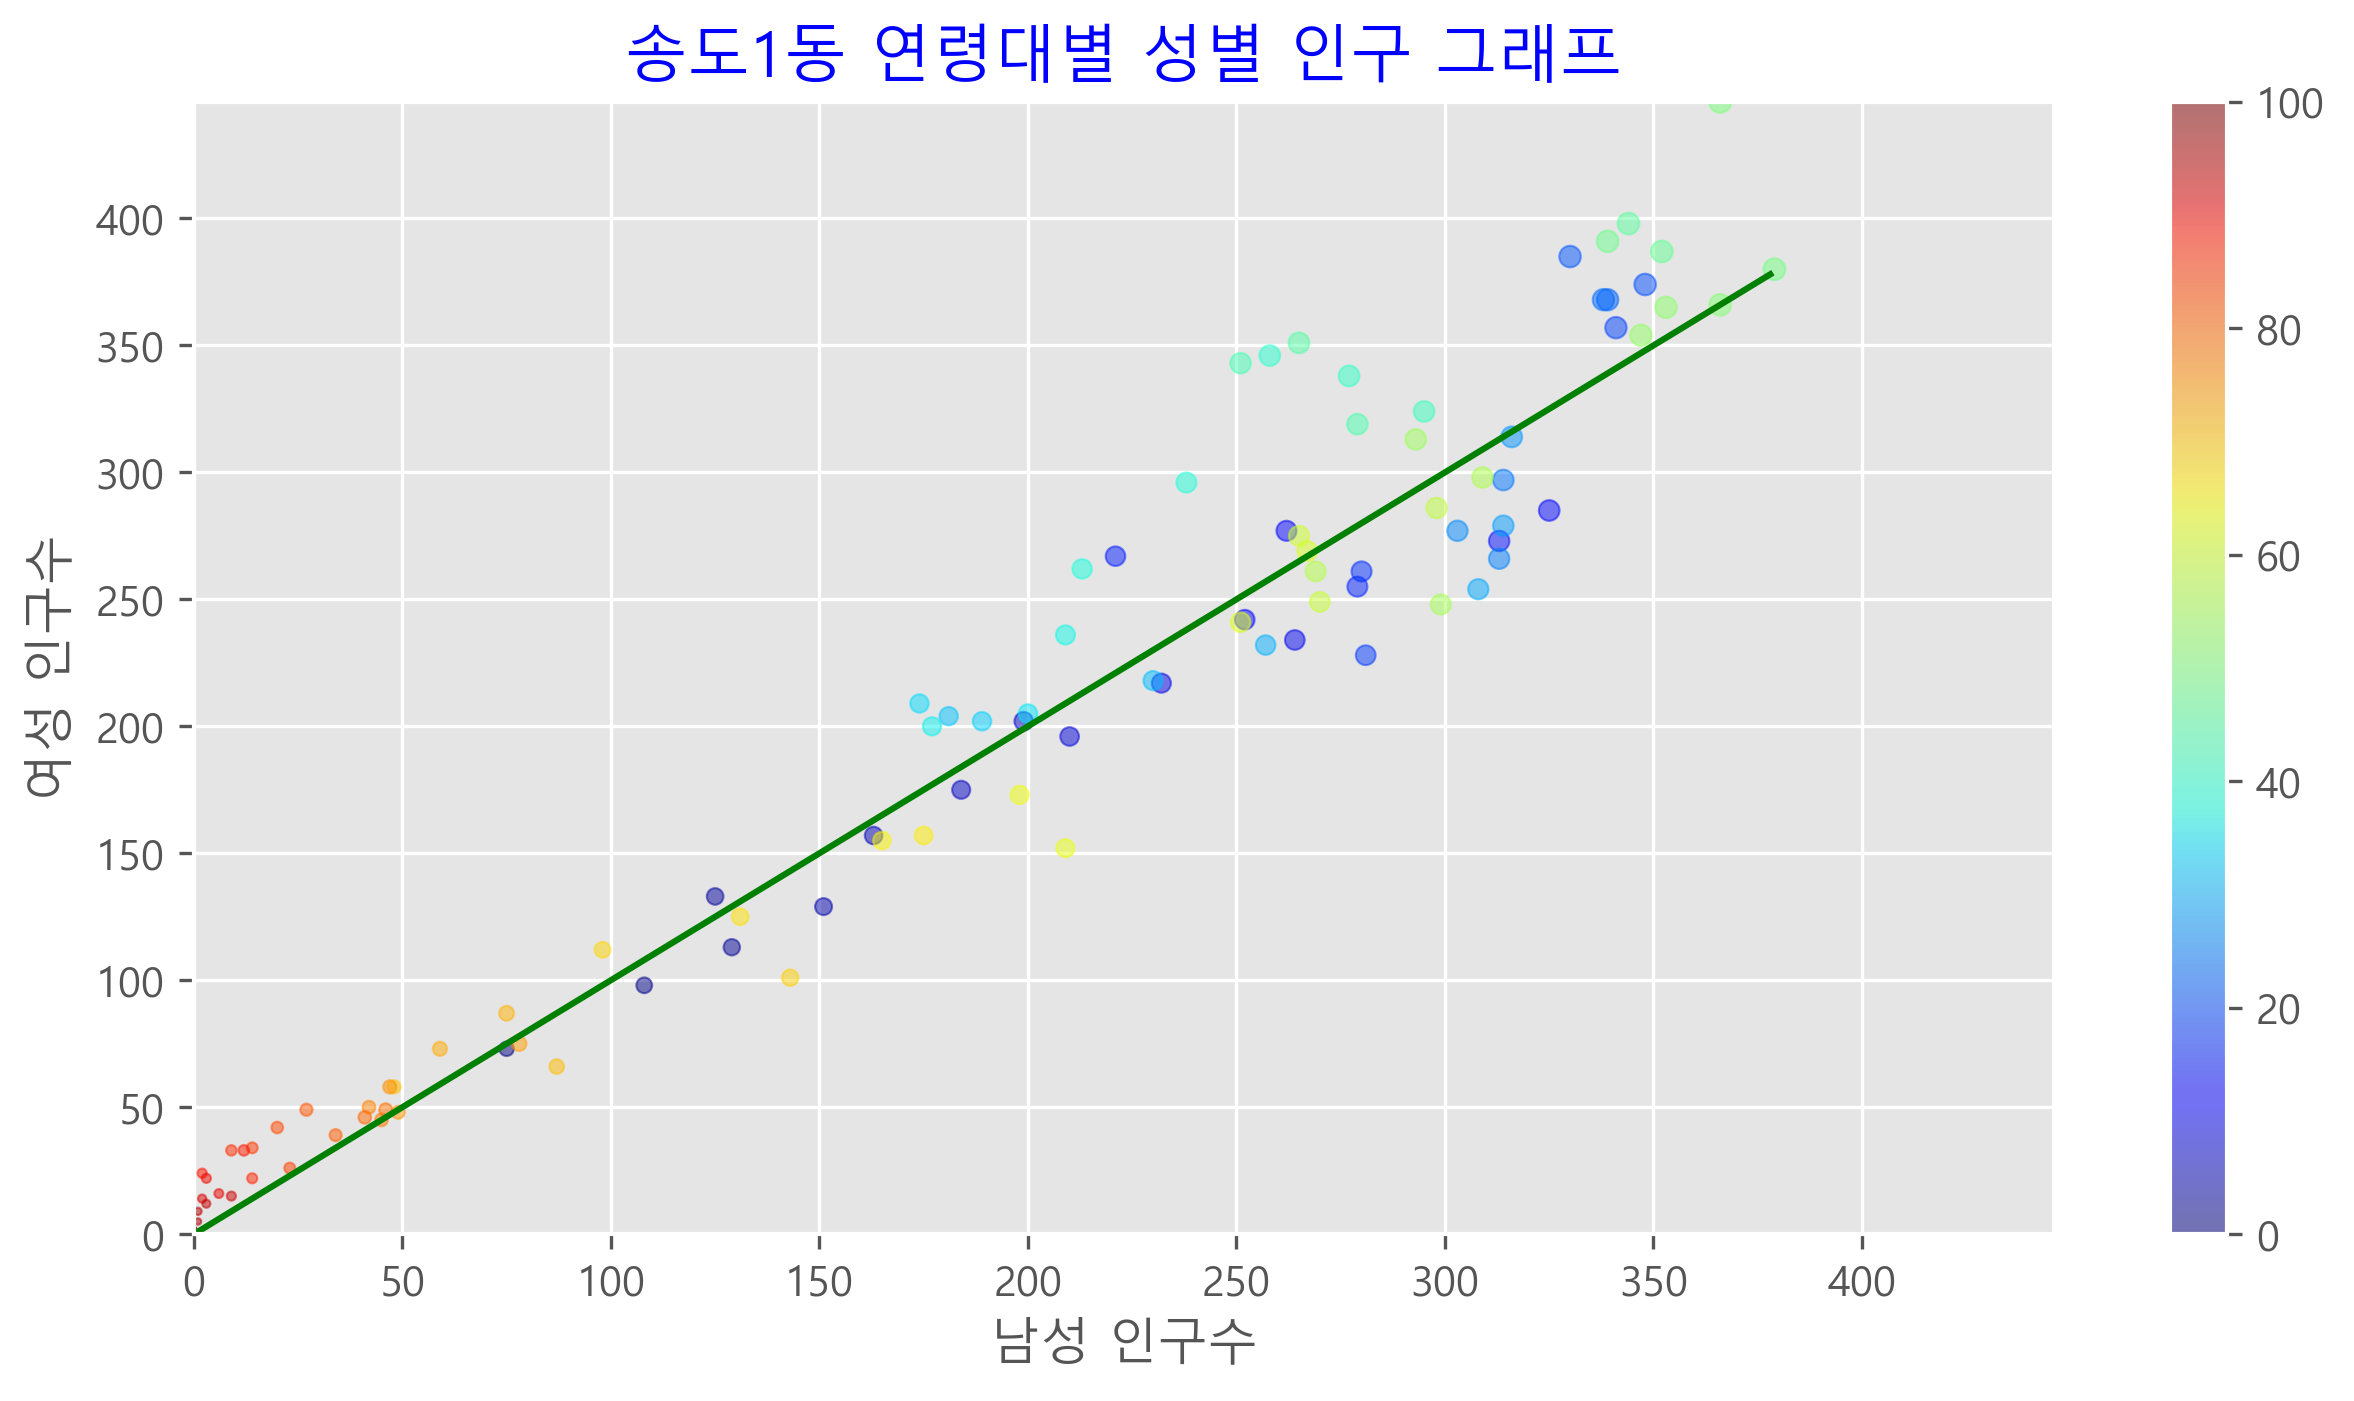

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize=(10, 5), dpi=300)
plt.title(name + ' 연령대별 성별 인구 그래프', fontsize=15, color='b')
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(male, female, s=size, c=range(101), alpha=0.5, cmap='jet') # 컬러맵 적용
plt.colorbar()

max_val = max(max(male), max(female))
plt.axis([0, max_val, 0, max_val])
line = range(max(male))
plt.plot(line, line, color='g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')

plt.show()

### 만약, sqrt() 함수를 사용하지 않으면 어떤 결과?

In [48]:
import csv
import math

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male, female = [], []
size = []
name = input('궁금한 동네 이름을 입력해주세요 : ')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            m, fm = int(row[i]), int(row[i+103])
            male.append(m)          # 남성 데이터 저장하기
            female.append(fm)       # 여성 데이터 저장하기
            size.append(m+fm)
        break

궁금한 동네 이름을 입력해주세요 : 송도1동


C:\Users\phi49\AppData\Local\Temp\ipykernel_32716\1229813172.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


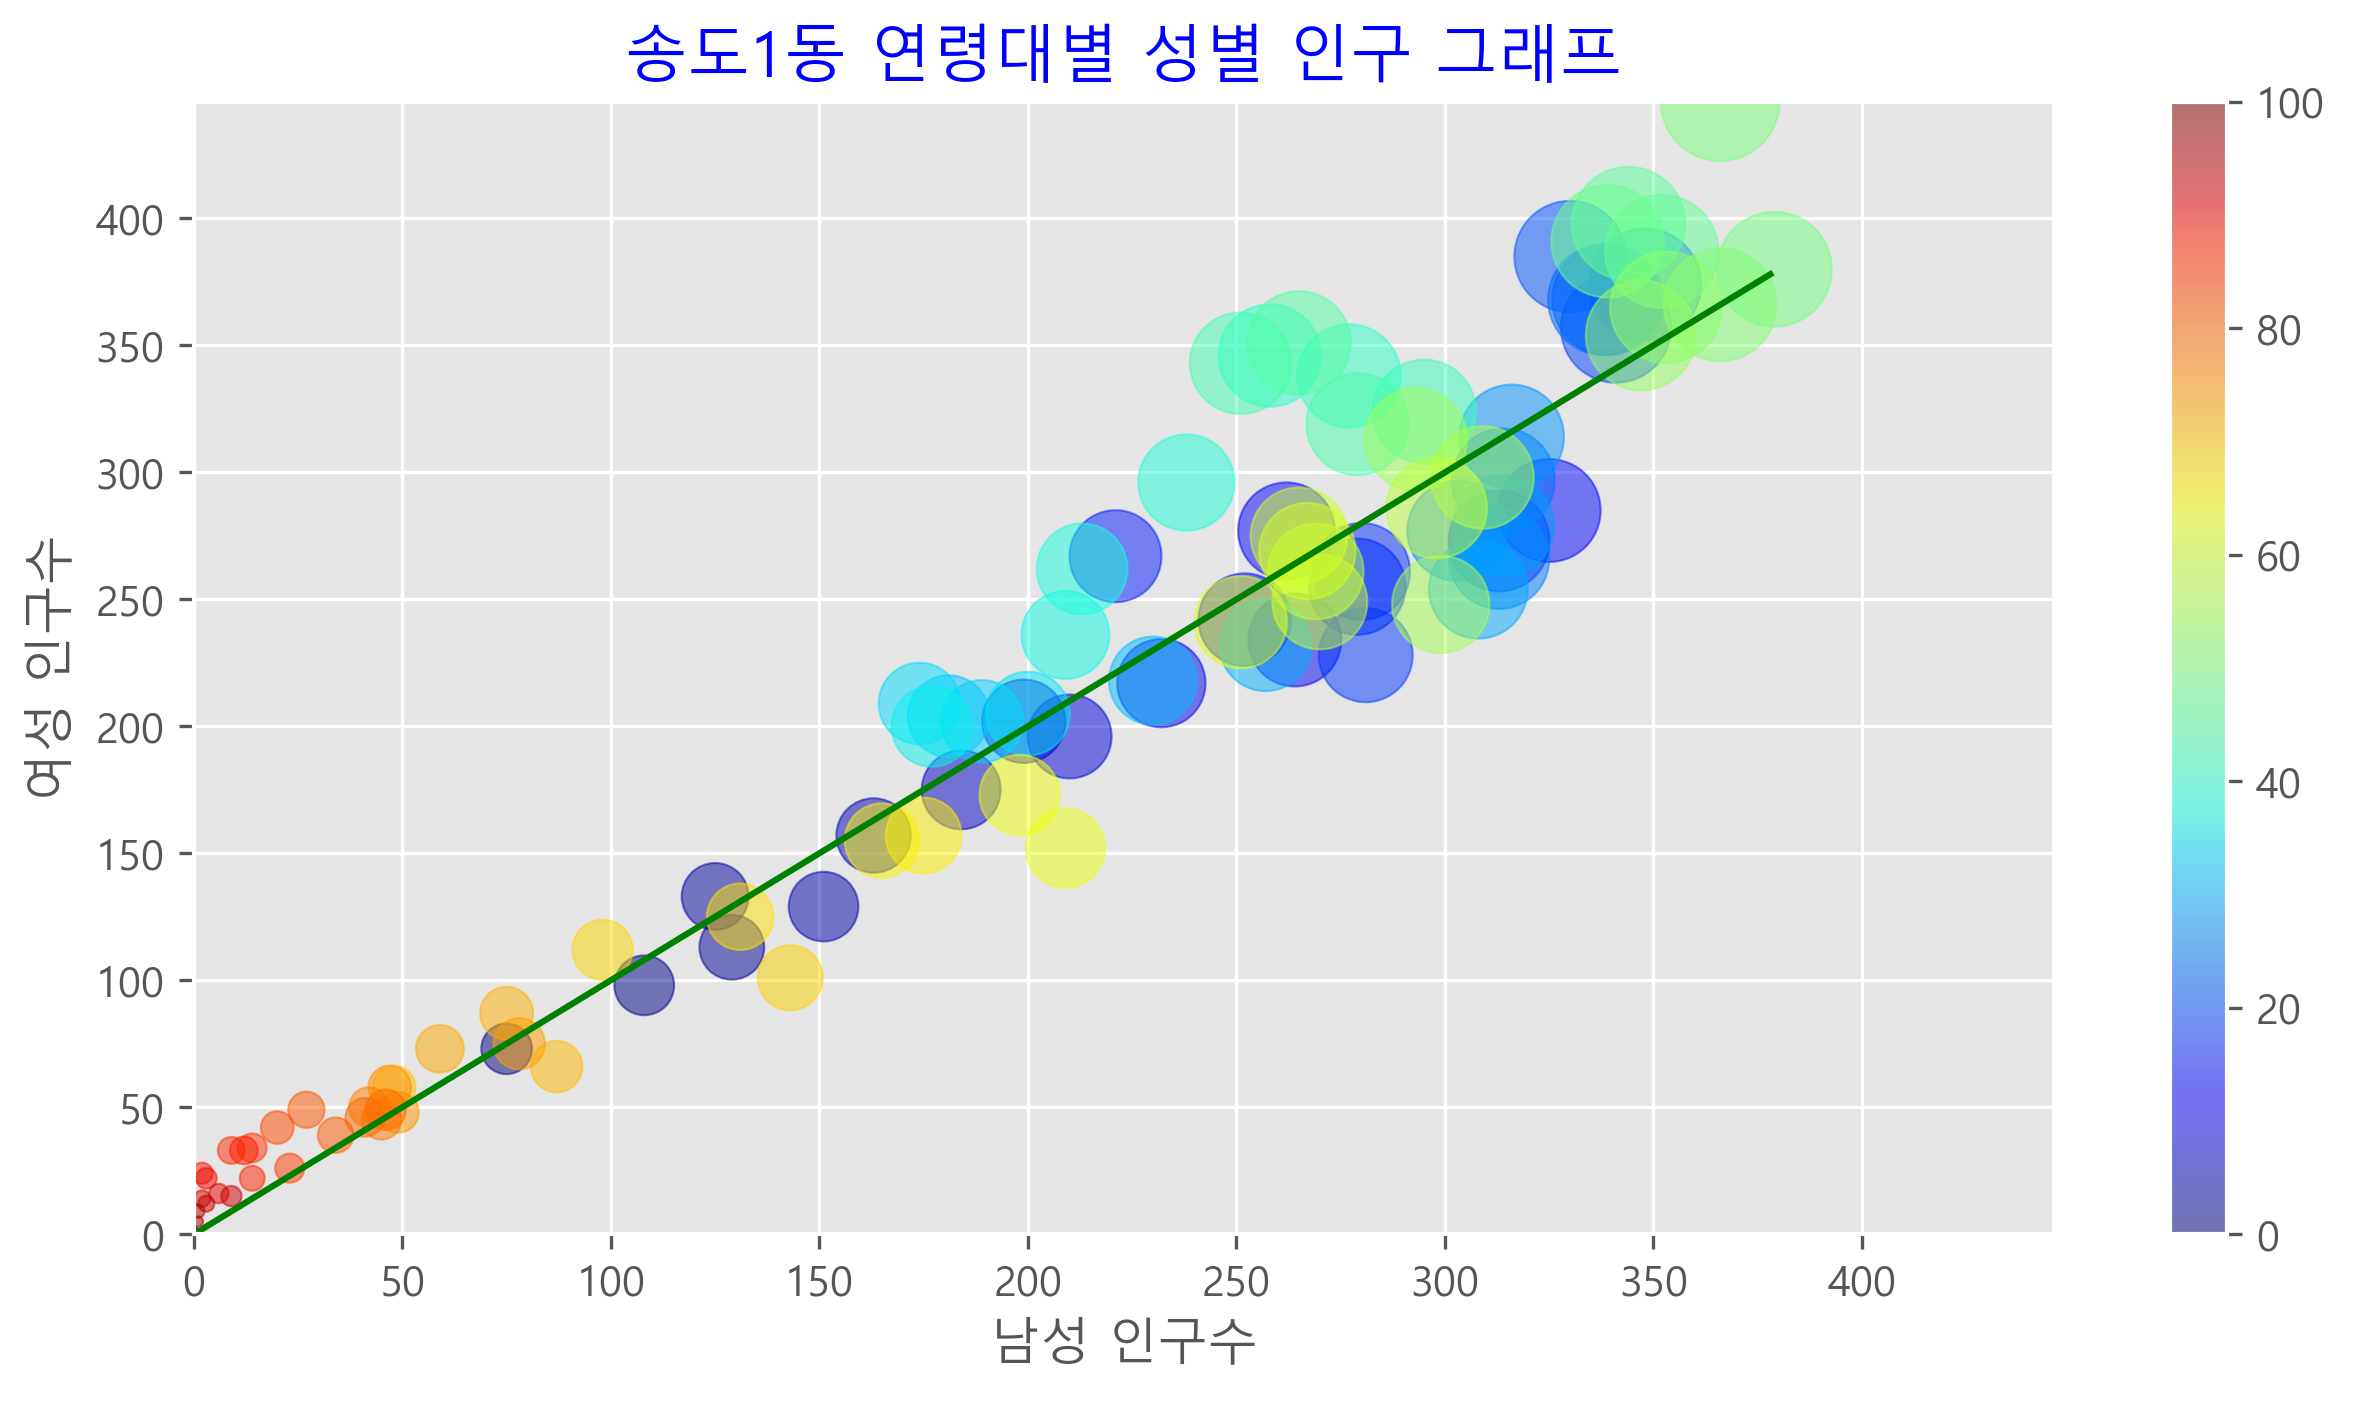

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize=(10, 5), dpi=300)
plt.title(name + ' 연령대별 성별 인구 그래프', fontsize=15, color='b')
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(male, female, s=size, c=range(101), alpha=0.5, cmap='jet') # 컬러맵 적용
plt.colorbar()

max_val = max(max(male), max(female))
plt.axis([0, max_val, 0, max_val])
line = range(max(male))
plt.plot(line, line, color='g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')

plt.show()